<a href="https://colab.research.google.com/github/renatostosp/aulas_redes_neurais_20231/blob/main/aula08a_mnist_renato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from keras.datasets import mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)

In [3]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [4]:
import gzip
import numpy as np


def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)

    return features, labels

In [5]:
(train_images, train_labels) = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
(test_images, test_labels) = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [6]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28, 1), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

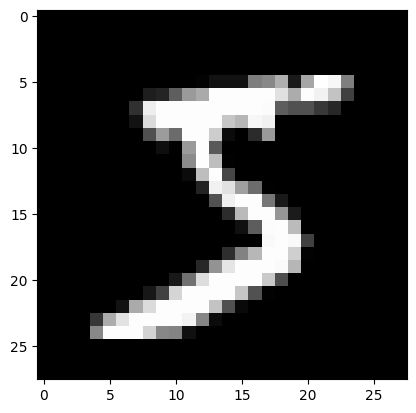

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [8]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28, 1), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [9]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [12]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.2643 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1082 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9885


In [14]:
predicted = model.predict(test_images[0:1])
predicted[0]

1/1 [==============================] - 0s 78ms/step


array([1.5158095e-07, 5.0995841e-10, 3.2212349e-06, 3.2460059e-05,
       1.8640115e-11, 4.4541899e-08, 1.5352246e-12, 9.9996042e-01,
       3.8912373e-07, 3.2748624e-06], dtype=float32)

In [15]:
predicted[0].argmax()

7

In [16]:
predicted[0][7]

0.9999604

In [17]:
test_labels[0]

7

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9778
test_acc: 0.9778000116348267


In [19]:
from keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [20]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2652 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1083 - accuracy: 0.9674
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


0.9776

In [21]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2623 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0703 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9793

In [22]:
(train_images, train_labels) = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
(test_images, test_labels) = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [23]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()),
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2654 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


0.9796

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2624 - accuracy: 0.9239
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9779

In [26]:
(train_images, train_labels) = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
(test_images, test_labels) = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [27]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 8s 5ms/step - loss: 0.2199 - accuracy: 0.9320
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0761 - accuracy: 0.9770
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9849